In [1]:
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.callbacks import Callback

In [2]:
# Load the dataset
data = pd.read_csv(r"C:\Users\ksarn\OneDrive\Desktop\Project 4\Fraudulent_E-Commerce_Transaction_Data_2.csv")
# Review the DataFrame
print(data.nunique())
data.head()


Transaction ID        23634
Customer ID           23634
Transaction Amount    18375
Transaction Date      23607
Payment Method            4
Product Category          5
Quantity                  5
Customer Age             74
Customer Location     14868
Device Used               3
IP Address            23634
Shipping Address      23634
Billing Address       23634
Is Fraudulent             2
Account Age Days        365
Transaction Hour         24
dtype: int64


,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour
0,c12e07a0-8a06-4c0d-b5cc-04f3af688570,8ca9f102-02a4-4207-ab63-484e83a1bdf0,42.32,2024-03-24 23:42:43,PayPal,electronics,1,40,East Jameshaven,desktop,110.87.246.85,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,0,282,23
1,7d187603-7961-4fce-9827-9698e2b6a201,4d158416-caae-4b09-bd5b-15235deb9129,301.34,2024-01-22 00:53:31,credit card,electronics,3,35,Kingstad,tablet,14.73.104.153,"5230 Stephanie Forge\nCollinsbury, PR 81853","5230 Stephanie Forge\nCollinsbury, PR 81853",0,223,0
2,f2c14f9d-92df-4aaf-8931-ceaf4e63ed72,ccae47b8-75c7-4f5a-aa9e-957deced2137,340.32,2024-01-22 08:06:03,debit card,toys & games,5,29,North Ryan,desktop,67.58.94.93,"195 Cole Oval\nPort Larry, IA 58422","4772 David Stravenue Apt. 447\nVelasquezside, ...",0,360,8
3,e9949bfa-194d-486b-84da-9565fca9e5ce,b04960c0-aeee-4907-b1cd-4819016adcef,95.77,2024-01-16 20:34:53,credit card,electronics,5,45,Kaylaville,mobile,202.122.126.216,"7609 Cynthia Square\nWest Brenda, NV 23016","7609 Cynthia Square\nWest Brenda, NV 23016",0,325,20
4,7362837c-7538-434e-8731-0df713f5f26d,de9d6351-b3a7-4bc7-9a55-8f013eb66928,77.45,2024-01-16 15:47:23,credit card,clothing,5,42,North Edwardborough,desktop,96.77.232.76,"2494 Robert Ramp Suite 313\nRobinsonport, AS 5...","2494 Robert Ramp Suite 313\nRobinsonport, AS 5...",0,116,15


In [3]:
# Display dataset structure
print(data.info())

# View the first few rows
print(data.head())

# Check for missing values
print(data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23634 entries, 0 to 23633
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Transaction ID      23634 non-null  object 
 1   Customer ID         23634 non-null  object 
 2   Transaction Amount  23634 non-null  float64
 3   Transaction Date    23634 non-null  object 
 4   Payment Method      23634 non-null  object 
 5   Product Category    23634 non-null  object 
 6   Quantity            23634 non-null  int64  
 7   Customer Age        23634 non-null  int64  
 8   Customer Location   23634 non-null  object 
 9   Device Used         23634 non-null  object 
 10  IP Address          23634 non-null  object 
 11  Shipping Address    23634 non-null  object 
 12  Billing Address     23634 non-null  object 
 13  Is Fraudulent       23634 non-null  int64  
 14  Account Age Days    23634 non-null  int64  
 15  Transaction Hour    23634 non-null  int64  
dtypes: f

In [4]:
# Drop irrelevant columns
data_cleaned = data.drop(columns=['Transaction ID', 'Customer ID', 'IP Address', 'Shipping Address', 'Billing Address'])
data_cleaned


# Convert 'Transaction Date' to datetime and extract features
data_cleaned['Transaction Date'] = pd.to_datetime(data_cleaned['Transaction Date'])
data_cleaned['Year'] = data_cleaned['Transaction Date'].dt.year
data_cleaned['Month'] = data_cleaned['Transaction Date'].dt.month
data_cleaned['Day'] = data_cleaned['Transaction Date'].dt.day
data_cleaned['Hour'] = data_cleaned['Transaction Date'].dt.hour
data_cleaned = data_cleaned.drop(columns=['Transaction Date'])


data_cleaned = pd.get_dummies(data_cleaned, columns=['Payment Method', 'Product Category', 'Device Used'], drop_first=True)
data_cleaned



,Transaction Amount,Quantity,Customer Age,Customer Location,Is Fraudulent,Account Age Days,Transaction Hour,Year,Month,Day,Hour,Payment Method_bank transfer,Payment Method_credit card,Payment Method_debit card,Product Category_electronics,Product Category_health & beauty,Product Category_home & garden,Product Category_toys & games,Device Used_mobile,Device Used_tablet
0,42.32,1,40,East Jameshaven,0,282,23,2024,3,24,23,False,False,False,True,False,False,False,False,False
1,301.34,3,35,Kingstad,0,223,0,2024,1,22,0,False,True,False,True,False,False,False,False,True
2,340.32,5,29,North Ryan,0,360,8,2024,1,22,8,False,False,True,False,False,False,True,False,False
3,95.77,5,45,Kaylaville,0,325,20,2024,1,16,20,False,True,False,True,False,False,False,True,False
4,77.45,5,42,North Edwardborough,0,116,15,2024,1,16,15,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23629,53.73,5,32,Rebeccafurt,0,363,16,2024,1,26,16,False,False,False,False,False,False,True,False,True
23630,47.42,4,41,Nataliefort,0,296,17,2024,2,25,17,False,True,False,False,False,False,False,False,False
23631,1045.23,1,9,East Shannonville,0,329,23,2024,3,28,23,True,False,False,False,True,False,False,False,True
23632,34.25,2,39,Lake Nicole,0,347,11,2024,2,9,11,False,False,True,False,False,True,False,True,False


In [5]:
# Define features and target
X = data_cleaned.drop(columns=['Is Fraudulent'])
y = data_cleaned['Is Fraudulent']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

Features shape: (23634, 19)
Target shape: (23634,)


In [6]:
X

,Transaction Amount,Quantity,Customer Age,Customer Location,Account Age Days,Transaction Hour,Year,Month,Day,Hour,Payment Method_bank transfer,Payment Method_credit card,Payment Method_debit card,Product Category_electronics,Product Category_health & beauty,Product Category_home & garden,Product Category_toys & games,Device Used_mobile,Device Used_tablet
0,42.32,1,40,East Jameshaven,282,23,2024,3,24,23,False,False,False,True,False,False,False,False,False
1,301.34,3,35,Kingstad,223,0,2024,1,22,0,False,True,False,True,False,False,False,False,True
2,340.32,5,29,North Ryan,360,8,2024,1,22,8,False,False,True,False,False,False,True,False,False
3,95.77,5,45,Kaylaville,325,20,2024,1,16,20,False,True,False,True,False,False,False,True,False
4,77.45,5,42,North Edwardborough,116,15,2024,1,16,15,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23629,53.73,5,32,Rebeccafurt,363,16,2024,1,26,16,False,False,False,False,False,False,True,False,True
23630,47.42,4,41,Nataliefort,296,17,2024,2,25,17,False,True,False,False,False,False,False,False,False
23631,1045.23,1,9,East Shannonville,329,23,2024,3,28,23,True,False,False,False,True,False,False,False,True
23632,34.25,2,39,Lake Nicole,347,11,2024,2,9,11,False,False,True,False,False,True,False,True,False


In [7]:
#Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)
X_train, X_test, y_train, y_test

(       Transaction Amount  Quantity  Customer Age  Customer Location  \
 9446               294.72         5            19        Melindafurt   
 14163              371.32         4            39        East Jeremy   
 7619                50.27         3            21       North Brandi   
 22974              283.50         5            30        Phillipside   
 21205               53.65         1            37    West Steveville   
 ...                   ...       ...           ...                ...   
 14815               76.42         5            23  New Christinaland   
 9897               395.55         1            31       Franklinland   
 493                104.36         4            61        Lake Robert   
 10041               43.74         2            14      Lake Jacktown   
 117                150.43         4            39          Jasonport   
 
        Account Age Days  Transaction Hour  Year  Month  Day  Hour  \
 9446                 91                 6  2024    

In [8]:
print("Customer Location" in X_train.columns)

True


In [9]:
X_train = X_train.drop(columns=['Customer Location'])
X_test = X_test.drop(columns=['Customer Location'])


In [10]:
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [11]:
## Compile, Train and Evaluate the Model


In [12]:
# Define the number of input features
number_input_features = X_train.shape[1]

# Define the number of nodes for each layer
hidden_nodes_layer1 =40
hidden_nodes_layer2 = 30
hidden_nodes_layer3 = 20
hidden_nodes_layer4 = 10

# Initialize the sequential model
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Fourth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu"))

# Output layer (binary classification)
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

c:\Users\ksarn\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 40)             │           760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │         1,230 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 20)             │           620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,831 (11.06 KB)

 Trainable params: 2,831 (11.06 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Compile the model
#  YOUR CODE GOES HERE
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [14]:
# Train the model
#  YOUR CODE GOES HERE
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)
fit_model

Epoch 1/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 1s 684us/step - accuracy: 0.8719 - loss: 0.3070
Epoch 2/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - accuracy: 0.9615 - loss: 0.1470
Epoch 3/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 0s 724us/step - accuracy: 0.9672 - loss: 0.1351
Epoch 4/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step - accuracy: 0.9672 - loss: 0.1285
Epoch 5/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step - accuracy: 0.9689 - loss: 0.1215
Epoch 6/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step - accuracy: 0.9675 - loss: 0.1237
Epoch 7/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step - accuracy: 0.9682 - loss: 0.1250
Epoch 8/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 0s 709us/step - accuracy: 0.9687 - loss: 0.1209
Epoch 9/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step - accuracy: 0.9675 - loss: 0.1219
Epoch 10/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 0s 689us/step - accuracy: 0.9689 - loss: 0.1179
Epoch 11/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step - accuracy: 0.9710 - loss: 0.1151
Epoch 12/100
591/59

In [15]:

# callback
class ResultsCaptureCallback(Callback):
    def __init__(self):
        super().__init__()
        self.epoch_results = []  # List to store results for each epoch

    def on_epoch_end(self, epoch, logs=None):
        # Append the logs dictionary (metrics) for the current epoch to the list
        self.epoch_results.append(logs)
        print(f"Epoch {epoch + 1}: {logs}")

results_callback = ResultsCaptureCallback()

# Train the model with the callback
fit_model = nn.fit(X_train_scaled, y_train, epochs=10, batch_size=32, callbacks=[results_callback])


all_results = results_callback.epoch_results


training_accuracy = [result['accuracy'] for result in all_results if 'accuracy' in result]
training_loss = [result['loss'] for result in all_results if 'loss' in result]

# Print results
print("All Epoch Results:", all_results)
print("Training Accuracy:", training_accuracy)
print("Training Loss:", training_loss)


Epoch 1/10
570/591 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step - accuracy: 0.9854 - loss: 0.0429Epoch 1: {'accuracy': 0.984027087688446, 'loss': 0.04677290469408035}
591/591 ━━━━━━━━━━━━━━━━━━━━ 0s 642us/step - accuracy: 0.9853 - loss: 0.0431
Epoch 2/10
565/591 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - accuracy: 0.9849 - loss: 0.0418Epoch 2: {'accuracy': 0.9848204255104065, 'loss': 0.04423767328262329}
591/591 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step - accuracy: 0.9849 - loss: 0.0419
Epoch 3/10
533/591 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - accuracy: 0.9866 - loss: 0.0380Epoch 3: {'accuracy': 0.9857195615768433, 'loss': 0.04140620306134224}
591/591 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step - accuracy: 0.9866 - loss: 0.0383
Epoch 4/10
522/591 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step - accuracy: 0.9868 - loss: 0.0419Epoch 4: {'accuracy': 0.9846617579460144, 'loss': 0.04343804717063904}
591/591 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - accuracy: 0.9866 - loss: 0.0420
Epoch 5/10
531/591 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step - accur

In [16]:
print(data.columns)

Index(['Transaction ID', 'Customer ID', 'Transaction Amount',
       'Transaction Date', 'Payment Method', 'Product Category', 'Quantity',
       'Customer Age', 'Customer Location', 'Device Used', 'IP Address',
       'Shipping Address', 'Billing Address', 'Is Fraudulent',
       'Account Age Days', 'Transaction Hour'],
      dtype='object')


In [17]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

148/148 - 0s - 1ms/step - accuracy: 0.9473 - loss: 0.3716
Loss: 0.37163200974464417, Accuracy: 0.9473238587379456


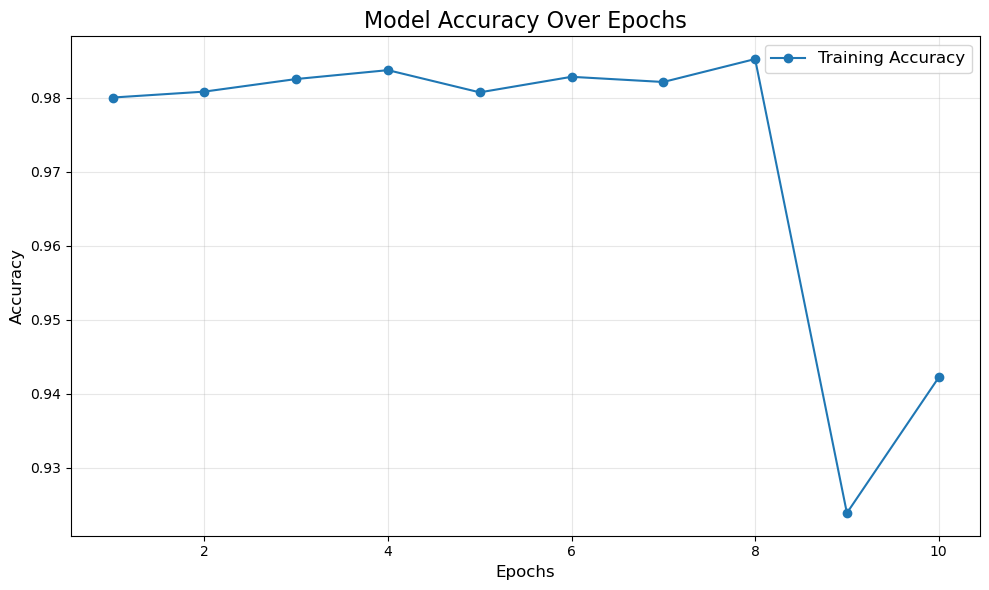

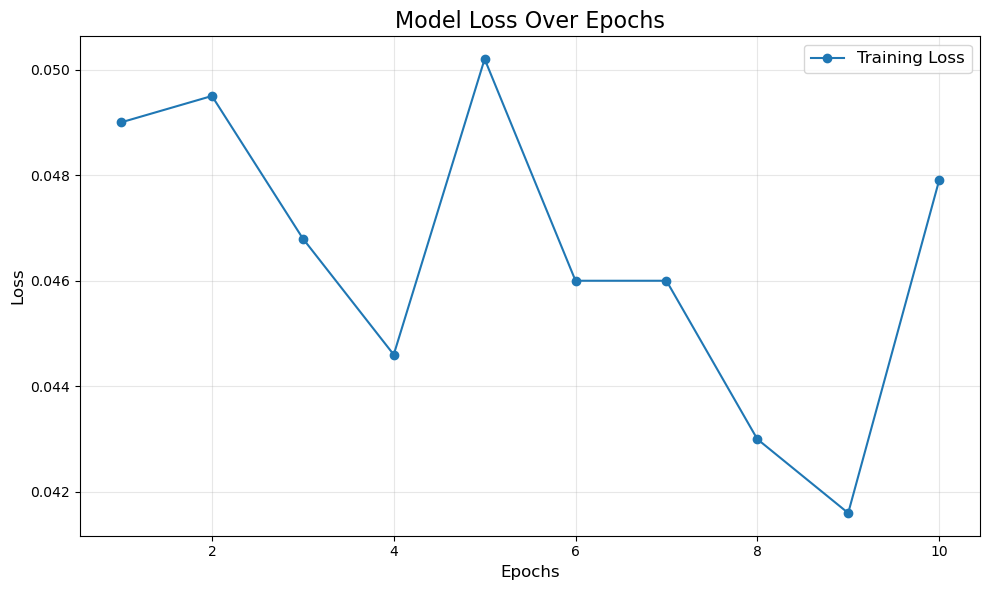

In [18]:
Epochs = list(range(1, 11))  # Example: 10 epochs
training_accuracy = [.98, .9808, .9825, 0.9837, 0.9807, 0.9828, 0.9821, 0.9852, 0.9239, 0.9422]  
training_loss = [.0490, .0495, 00.0468, 0.0446, 0.0502, 0.046, 0.046, 0.043, 0.0416, 0.0479]  


# Plot
plt.figure(figsize=(10, 6))
plt.plot(Epochs, training_accuracy, label="Training Accuracy", marker='o', linestyle='-', markersize=6)
plt.title("Model Accuracy Over Epochs", fontsize=16)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(Epochs, training_loss, label="Training Loss", marker='o', linestyle='-', markersize=6)
plt.title("Model Loss Over Epochs", fontsize=16)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [19]:
# Export our model to HDF5 file
#  YOUR CODE GOES HERE
#nn.save("AlphabetSoupCharity.h5")

nn.save("Fraudulent transaction_Optimization.h5")